In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
print(tf.__version__)

2.1.0


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
mnist = keras.datasets.fashion_mnist

In [5]:
type(mnist)

module

In [6]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

In [7]:
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [8]:
np.max(X_train)

255

In [9]:
np.mean(X_train)

72.94035223214286

In [10]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [11]:
class_names = ['top', 'trouser','pullover','coat','sandal','shirt','sneaker', 'bag','ankle boot']

# Data Exploration

In [12]:
X_train.shape

(60000, 28, 28)

In [13]:
X_test.shape

(10000, 28, 28)

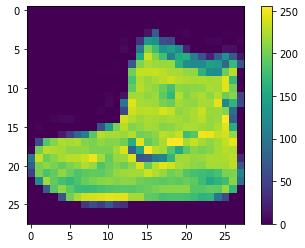

In [14]:
plt.figure()
plt.imshow(X_train[0])# shows the number of the item
plt.colorbar()

In [15]:
X_train = X_train / 255.0 # X_train divided by the maximum value in the training set.

In [16]:
X_test = X_test /255.0

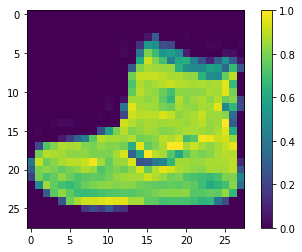

In [17]:
plt.figure()
plt.imshow(X_train[0])
plt.colorbar()

# Build the model with TF2.0

In [18]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense

In [19]:
model = Sequential([
    
])
model.add(Flatten(input_shape = (28,28)))# changes it to one dimension
model.add(Dense(128, activation = 'relu'))# Number of nodes
model.add(Dense(10,activation = 'softmax'))#Output layer

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [21]:
# Define a loss function - minimizing the error. 
#Optimizer - model is updated given weights.
#Metrics

model.compile(optimizer = 'adam',loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [22]:
history = model.fit(X_train,y_train, epochs=10, batch_size = 10, validation_split = 0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 34s 713us/sample - loss: 0.4965 - accuracy: 0.8247 - val_loss: 0.4136 - val_accuracy: 0.8507
Epoch 2/10
48000/48000 [==============================] - 29s 605us/sample - loss: 0.3750 - accuracy: 0.8645 - val_loss: 0.3645 - val_accuracy: 0.8666
Epoch 3/10
48000/48000 [==============================] - 26s 538us/sample - loss: 0.3392 - accuracy: 0.8748 - val_loss: 0.3540 - val_accuracy: 0.8698
Epoch 4/10
48000/48000 [==============================] - 27s 555us/sample - loss: 0.3153 - accuracy: 0.8838 - val_loss: 0.3511 - val_accuracy: 0.8767
Epoch 5/10
48000/48000 [==============================] - 29s 612us/sample - loss: 0.2969 - accuracy: 0.8903 - val_loss: 0.3519 - val_accuracy: 0.8728
Epoch 6/10
48000/48000 [==============================] - 32s 657us/sample - loss: 0.2808 - accuracy: 0.8957 - val_loss: 0.3741 - val_accuracy: 0.8689
Epoch 7/10
48000/48000 [====================

In [23]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(test_acc)

10000/10000 [==============================] - 1s 130us/sample - loss: 0.3695 - accuracy: 0.8753
0.8753


In [24]:
history.history

{'loss': [0.4964774211870584,
  0.37495186627650884,
  0.3392274711403782,
  0.3152936709879335,
  0.2968802836954031,
  0.2808028066780389,
  0.27009456845885627,
  0.2578206150059653,
  0.24801362454322468,
  0.23943276035889235],
 'accuracy': [0.8246875,
  0.8644583,
  0.8747917,
  0.8837708,
  0.8903125,
  0.8957083,
  0.8993125,
  0.9023542,
  0.90625,
  0.9094167],
 'val_loss': [0.41364082774690664,
  0.3645184562623035,
  0.35404602173774036,
  0.35105843893165,
  0.35189315901632656,
  0.37410493929778266,
  0.34185561207494175,
  0.3200652055297057,
  0.33299344356739313,
  0.3442999182708445],
 'val_accuracy': [0.85066664,
  0.86658335,
  0.86975,
  0.87675,
  0.8728333,
  0.8689167,
  0.88091666,
  0.8921667,
  0.88591665,
  0.88275]}

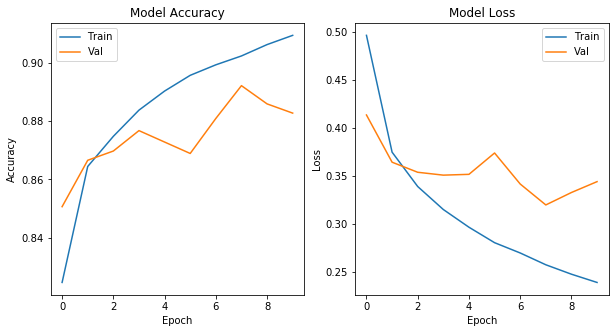

In [25]:
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')

plt.subplot(122)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc = 'upper right')
plt.show()


In [26]:
from sklearn.metrics import accuracy_score

y_pred = model.predict_classes(X_test)
accuracy_score(y_test,y_pred)

0.8753

In [27]:
pred = model.predict(X_test)
pred

array([[1.7554991e-07, 2.2182551e-09, 1.7395465e-11, ..., 6.1205991e-02,
        1.6038230e-08, 9.3878549e-01],
       [2.0871108e-04, 2.6608481e-16, 9.9871159e-01, ..., 5.5600031e-16,
        1.0894086e-10, 7.9592504e-12],
       [3.2415490e-09, 1.0000000e+00, 5.0502518e-15, ..., 5.9300105e-29,
        1.8531162e-12, 7.4959609e-26],
       ...,
       [9.3887394e-08, 1.1683509e-16, 3.5227641e-09, ..., 1.0804665e-14,
        9.9999988e-01, 6.9795730e-18],
       [5.2532673e-10, 9.9999988e-01, 5.1395607e-13, ..., 1.3895622e-19,
        1.6061993e-12, 2.8089180e-21],
       [4.2859460e-06, 2.4297933e-11, 2.0655048e-07, ..., 4.3216196e-04,
        1.5561860e-04, 1.6441025e-07]], dtype=float32)

In [28]:
pred[0]

array([1.7554991e-07, 2.2182551e-09, 1.7395465e-11, 1.7108604e-07,
       1.0428952e-12, 8.1781136e-06, 6.5690675e-10, 6.1205991e-02,
       1.6038230e-08, 9.3878549e-01], dtype=float32)

In [29]:
np.argmax(pred[0])

9

In [52]:
!conda install -c conda-forge mlxtend 

Solving environment: ...working... done

# All requested packages already installed.



In [55]:
#from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

#mat = confusion_matrix(y_test, y_pred)
#plot_confusion_matrix(conf_mat=mat,)

# Building Your First ANN with TensorFlow 2.0
Steps for building your first ANN
- Data pre-processing
- Add input layer
- Random W init
- Add hidden layers
- Select Optimizer, Loss and Performance Metrics
- Compile Model fit to train the model
- Evaluate the model
- Adjust otimization parameters or model if needed.

In [32]:
import tensorflow as tf
from tensorflow import keras 
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense

In [33]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

In [34]:
dataset = pd.read_csv(r'https://raw.githubusercontent.com/laxmimerit/Building-Your-First-ANN-with-TensorFlow-2.0/master/Customer_Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [35]:
X = dataset.drop(labels=['CustomerId','Surname','RowNumber','Exited'],axis=1)
y = dataset['Exited']

In [36]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [37]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [38]:
from sklearn.preprocessing import LabelEncoder # Used to change words into numerical data

label1 = LabelEncoder()
X['Geography'] = label1.fit_transform(X['Geography'])

In [39]:
label2 = LabelEncoder()
X['Gender'] = label2.fit_transform(X['Gender'])

In [40]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,0,42,2,0.00,1,1,1,101348.88
1,608,2,0,41,1,83807.86,1,0,1,112542.58
2,502,0,0,42,8,159660.80,3,1,0,113931.57
3,699,0,0,39,1,0.00,2,0,0,93826.63
4,850,2,0,43,2,125510.82,1,1,1,79084.10


In [41]:
X = pd.get_dummies(X, drop_first=True, columns=['Geography'])
X.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_1,Geography_2
0,619,0,42,2,0.00,1,1,1,101348.88,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,1


# Feature Standardization

In [42]:
from sklearn.preprocessing import StandardScaler
X_train, y_train, X_test, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)                                               

In [43]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
y_train = scaler.transform(y_train)

In [44]:
X_train

array([[-1.24021723, -1.09665089,  0.77986083, ...,  1.64099027,
        -0.57812007, -0.57504086],
       [ 0.75974873,  0.91186722, -0.27382717, ..., -1.55587522,
         1.72974448, -0.57504086],
       [-1.72725557, -1.09665089, -0.9443559 , ...,  1.1038111 ,
        -0.57812007, -0.57504086],
       ...,
       [-0.51484098,  0.91186722,  0.87565065, ..., -1.01507508,
         1.72974448, -0.57504086],
       [ 0.73902369, -1.09665089, -0.36961699, ..., -1.47887193,
        -0.57812007, -0.57504086],
       [ 0.95663657,  0.91186722, -1.32751517, ...,  0.50945854,
        -0.57812007,  1.73900686]])

# Build ANN

In [45]:
    model = Sequential()
    model.add(Dense(X.shape[1], activation = 'relu', input_dim = X.shape[1]))
    model.add(Dense(128, activation = 'relu'))
    model.add(Dense(1, activation = 'sigmoid'))

In [46]:
X.shape[1]

11

In [47]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [56]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D, ZeroPadding2D, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.optimizers import SGD

print(tf.__version__)

2.1.0


In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
